In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import missingno as msno
import sweetviz as sv
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.drop(columns=['url', 'timedelta'])
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# EDA 1

## See the spread of the data

In [3]:
# report = sv.analyze(df)
# report.show_notebook()

## Check for missing values

In [4]:
# msno.bar(df)

Seems like there are no missing values!!

## Look at target variable `shares`

### No transformations

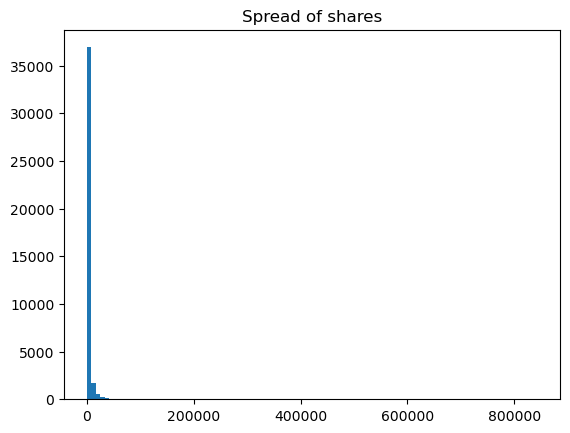

In [5]:
plt.hist(df['shares'], 100)
plt.title('Spread of shares')
plt.show()

## Standardize data

## Remove outliers greater than 3 standard deviations from the mean

In [6]:
standard = StandardScaler(with_std=True)

std_df = df.copy()

std_df['shares'] = standard.fit_transform(df[['shares']])

# Correct usage of .where
std_df['shares'] = std_df['shares'].where(std_df['shares'] <= 3, np.nan)
# Drop rows with NaN (optional)
std_df.dropna(subset=['shares'], inplace=True)

In [7]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
y = std_df[['shares']].to_numpy()

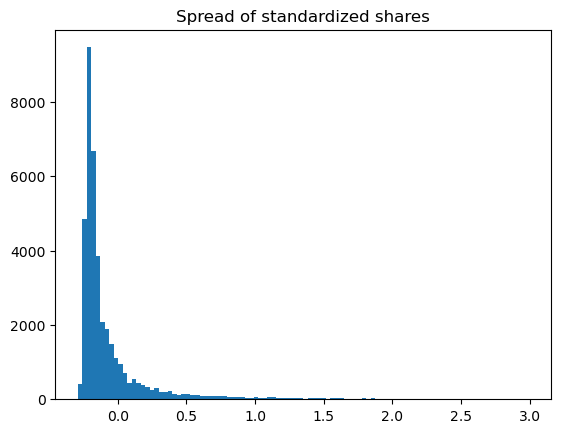

In [9]:
plt.hist(y, 100)
plt.title('Spread of standardized shares')
plt.show()

In [10]:
y = df['shares'].to_numpy()

## Normalize data

In [11]:
mean = y.mean()
y_normal = (y-mean) / mean

In [12]:
y_normal.sort()

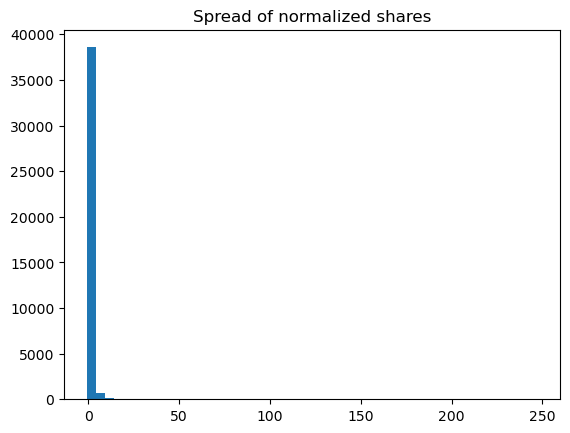

In [13]:
plt.hist(y_normal, 50)
plt.title('Spread of normalized shares')
plt.show()

## Log transform data

In [14]:
log_df = df.copy()

log_df['shares'] = np.log10(df['shares'])

In [15]:
log_df['shares'].describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

In [16]:
y = log_df['shares']

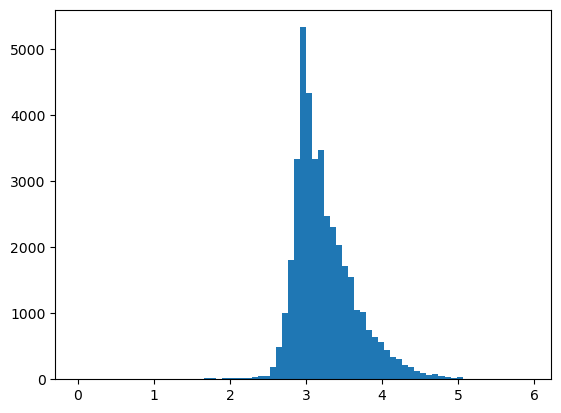

In [17]:
plt.hist(y, 75)
plt.show()

***Log base 10 transformations are the best transformation because of the close spread of the transformed data and most of the data are centered around 3 with a range of [0,6)***

# EDA 2

In [18]:
df['shares'] = log_df['shares']
train_df, test_df = train_test_split(df, random_state=10)

In [19]:
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [62]:
# Use sklearn to get fast estimates and ols model to trim features and draw conclusions
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# No need to transform pred because the model learned to predict log values

print('In sample metrics: ')
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'{r2=:.4f} {mse=:.4f}')

print('Out of sample metrics: ')
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'{r2=:.4f} {mse=:.4f}')

In sample metrics: 
r2=0.1256 mse=0.1420
Out of sample metrics: 
r2=0.1285 mse=0.1448


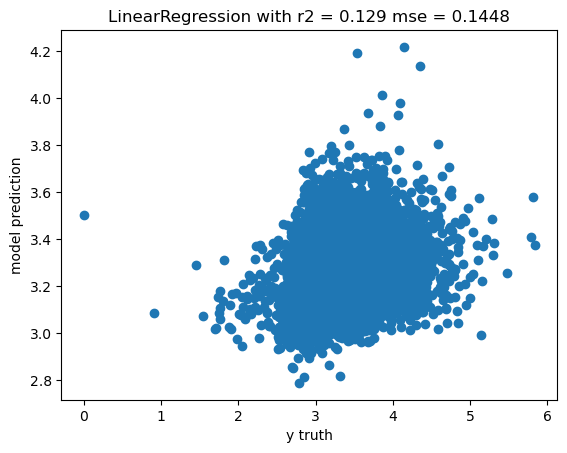

In [64]:
plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [65]:
feats = model.feature_names_in_
coef = model.coef_
info = list(zip(feats, coef))

In [66]:
key = lambda a: abs(a[1])
info = sorted(info, key=key)
info[-20:]

[('data_channel_is_lifestyle', -0.04623713801713661),
 ('abs_title_subjectivity', 0.05845925973547453),
 ('rate_positive_words', 0.06415021755232832),
 ('global_sentiment_polarity', -0.06432656559597578),
 ('avg_negative_polarity', -0.06454732631755851),
 ('is_weekend', 0.06743214032526189),
 ('n_non_stop_words', 0.06820198124823837),
 ('data_channel_is_socmed', 0.0701441650325408),
 ('data_channel_is_bus', -0.07102456571167899),
 ('n_non_stop_unique_tokens', -0.07704929682339763),
 ('data_channel_is_entertainment', -0.07983031709767875),
 ('min_positive_polarity', -0.08701097560396087),
 ('global_subjectivity', 0.17320451912327883),
 ('global_rate_negative_words', 0.23381962996114936),
 ('global_rate_positive_words', -0.4293162735577448),
 ('LDA_02', 49.64324747236646),
 ('LDA_01', 49.677684250540295),
 ('LDA_03', 49.696187503566435),
 ('LDA_04', 49.74995682816797),
 ('LDA_00', 49.83047876179681)]

In [67]:
df["LDA_04"].describe()

count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

The most significant features are these: `LDA_02`, `LDA_01`, `LDA_03`, `LDA_04`, `LDA_00`

# EDA 3

In [68]:
def find_reg_tree(train_df, test_df, max_depth):
    y_train = train_df['shares']
    X_train = train_df.drop(columns='shares')

    y_test = test_df['shares']
    X_test = test_df.drop(columns='shares')

    info = []

    for i in [*list(range(1,10)),1e1, 2e1, 3e1]:
        print()
        # max_features=1.0 gives the best r2 and MSE values
        # min_samples_leaf=1 is the best
        # min_samples_split=2 is the best
        model = RandomForestRegressor(n_estimators=int(i), max_features=4, random_state=1)
        model.fit(X_train, y_train)

        # Check for overfitting
        pred = model.predict(X_train)
        r2 = r2_score(y_train, pred)
        mse = mean_squared_error(y_train, pred)
        print(f'{i}: train_{r2=:.4f} train_{mse=:.4f}')

        plt.scatter(y_train, pred)
        plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
        plt.xlabel('y truth')
        plt.ylabel('model prediction')
        plt.show()


        # Check for generalization
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        print(f'{i}: test_{r2=:.4f} test_{mse=:.4f}')

        feat_imp = model.feature_importances_
        feat = model.feature_names_in_
        features = list(zip(feat, feat_imp))
        info.append((i,r2,mse,features))

        plt.scatter(y_test, pred)
        plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
        plt.xlabel('y truth')
        plt.ylabel('model prediction')
        plt.show()

    return info

In [ ]:
info = find_reg_tree(train_df, test_df, 50)

In [67]:
high_r2 = lambda a : abs(a[1])
high_mse = lambda a : a[2]

r2_info = sorted(info,key=high_r2)
mse_info = sorted(info,key=high_mse)

In [68]:
r2_info[-5:]

[(20.0,
  0.11967191086972484,
  0.14624503440975045,
  [('n_tokens_title', 0.0185345482451545),
   ('n_tokens_content', 0.02387649100289583),
   ('n_unique_tokens', 0.025740705483817006),
   ('n_non_stop_words', 0.00045350187951105105),
   ('n_non_stop_unique_tokens', 0.025900963608458016),
   ('num_hrefs', 0.023898768229228023),
   ('num_self_hrefs', 0.01307880306618105),
   ('num_imgs', 0.01798093127393829),
   ('num_videos', 0.010169759067021538),
   ('average_token_length', 0.02505255887833417),
   ('num_keywords', 0.011570581201485896),
   ('data_channel_is_lifestyle', 0.0018965459402386358),
   ('data_channel_is_entertainment', 0.00561817688139994),
   ('data_channel_is_bus', 0.0021125260712639127),
   ('data_channel_is_socmed', 0.0031784531457518424),
   ('data_channel_is_tech', 0.003837424797298518),
   ('data_channel_is_world', 0.004787386916840028),
   ('kw_min_min', 0.006848664098825988),
   ('kw_max_min', 0.02426602842994965),
   ('kw_avg_min', 0.02764560007287284),
   ('k

In [71]:
for t in info:
    sig_feature = sorted(t[-1], key=high_r2)
    print(t[0], sig_feature[-5:])


1 [('kw_avg_max', 0.03189922866105583), ('LDA_03', 0.03591729256142787), ('kw_avg_avg', 0.03613461921062962), ('kw_max_avg', 0.0412380986733302), ('self_reference_max_shares', 0.044363942701543854)]
2 [('kw_min_avg', 0.031445852336591654), ('LDA_03', 0.031790115638538514), ('kw_avg_avg', 0.034596106870501575), ('self_reference_max_shares', 0.03521014851501042), ('kw_max_avg', 0.058062225222893116)]
3 [('LDA_03', 0.028555198609638458), ('kw_avg_max', 0.028794758421996792), ('kw_avg_avg', 0.03777970148055811), ('self_reference_max_shares', 0.038692691295550245), ('kw_max_avg', 0.055000422563582875)]
4 [('kw_avg_max', 0.029435597635264526), ('kw_min_avg', 0.029893249506686977), ('self_reference_max_shares', 0.035069562806559755), ('kw_avg_avg', 0.0364234011055687), ('kw_max_avg', 0.051476474252250076)]
5 [('kw_avg_min', 0.029181264806106732), ('kw_avg_max', 0.02918835837961149), ('self_reference_max_shares', 0.0345783160398669), ('kw_avg_avg', 0.03709855007496951), ('kw_max_avg', 0.051486

Most significant features across all the RandomForest models are the `kw_max_avg`, `self_reference_max_shares`, and `kw_avg_avg`.

# EDA 4

## Exploring relationships between 8 variables

/Users/chasezundel/opt/anaconda3/envs/ML/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


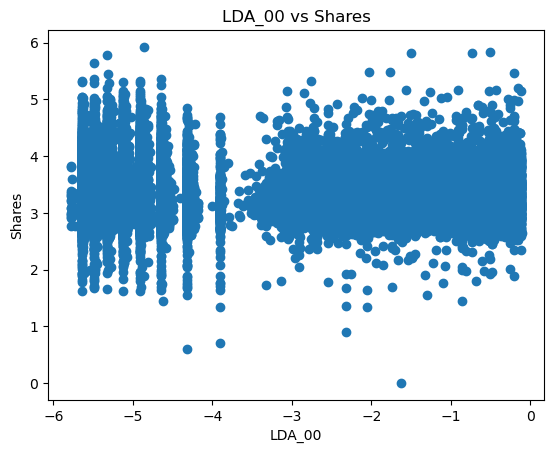

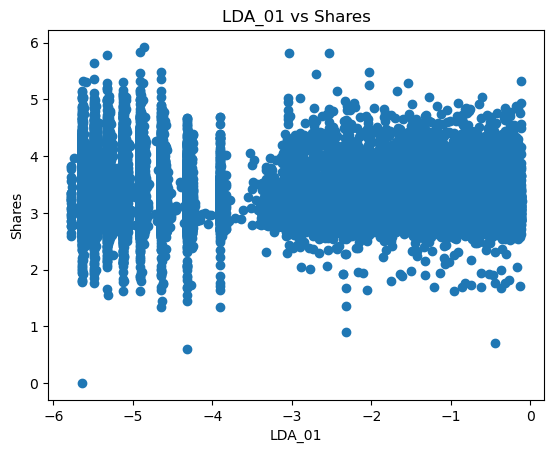

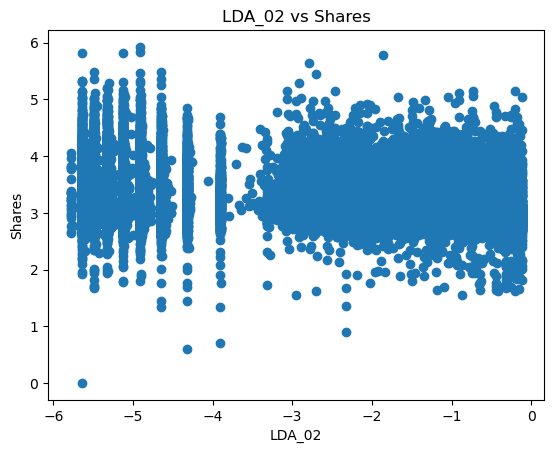

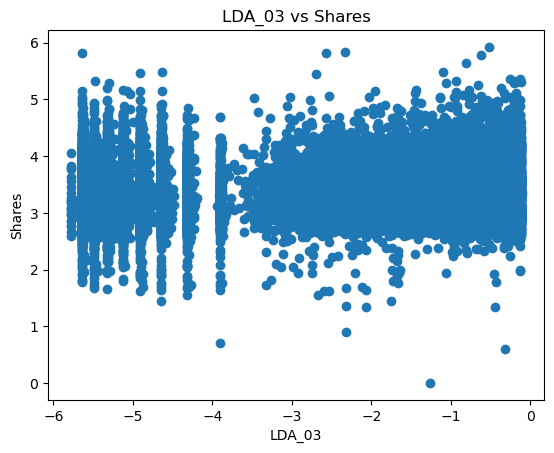

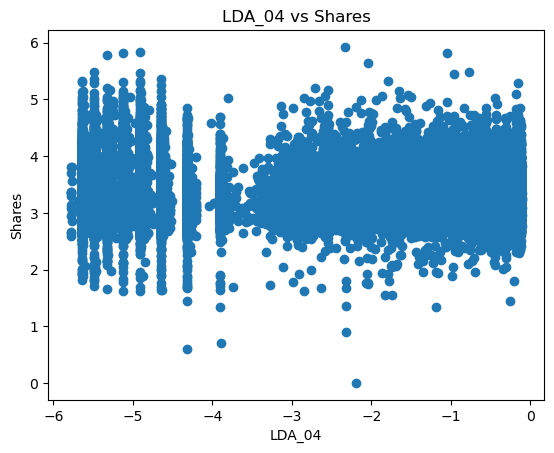

/Users/chasezundel/opt/anaconda3/envs/ML/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


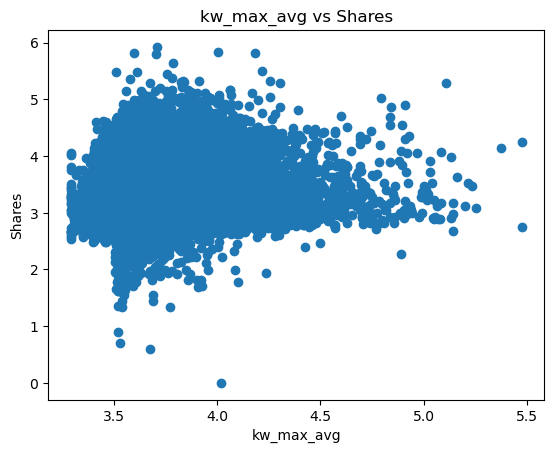

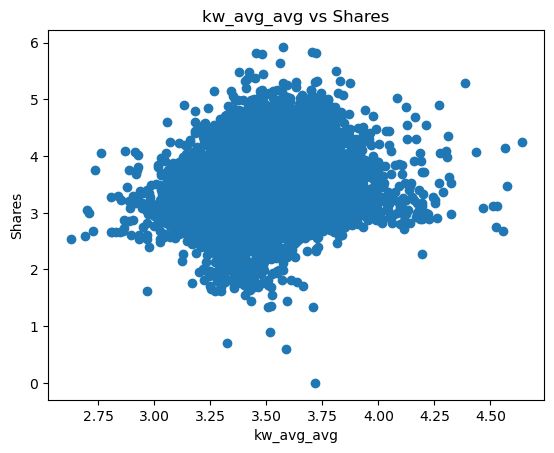

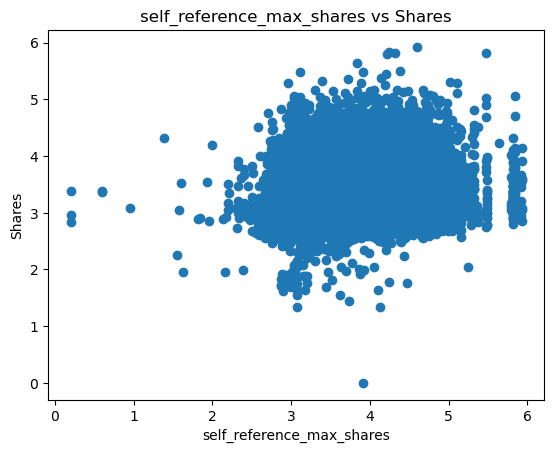

In [20]:
sig_feats_df = df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','kw_max_avg','kw_avg_avg','self_reference_max_shares']]
y = df['shares']

for feat in sig_feats_df.columns:
    if 'LDA' in feat:
        plt.scatter(np.log2(sig_feats_df[feat]), y)
    else:
        plt.scatter(np.log10(sig_feats_df[feat]), y)
    plt.xlabel(feat)
    plt.ylabel('Shares')
    plt.title(f'{feat} vs Shares')
    plt.show()

## Apply transformations

In [32]:
sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = np.log2(df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']])
sig_feats_df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']] = np.log10(df[['kw_max_avg','kw_avg_avg','self_reference_max_shares']])

/Users/chasezundel/opt/anaconda3/envs/ML/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_58594/2875549005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']] = np.log2(df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']])
/Users/chasezundel/opt/anaconda3/envs/ML/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_58594/2875549005.py:2: SettingWithCopyWarning: 
A v

In [33]:
sig_feats_df['shares'] = y

/var/folders/2g/3j1bfngd2515lb3wwz2840140000gn/T/ipykernel_58594/2538032854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_feats_df['shares'] = y


In [ ]:
sig_feats_df = sig_feats_df.replace(-np.inf, 0)

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,kw_max_avg,kw_avg_avg,self_reference_max_shares,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,-3.812096,-4.078519,-3.553863,-3.567831,-3.395802,3.683916,3.463920,3.004064,3.246288
std,1.910127,1.719236,1.979692,2.016443,1.987570,0.252802,0.212602,1.490705,0.404105
min,-5.781348,-5.781349,-5.781352,-5.781346,-5.781323,0.000000,0.000000,0.000000,0.000000
25%,-5.319004,-5.321208,-5.129281,-5.129281,-5.129169,3.551706,3.377024,3.041393,2.975891
50%,-4.904554,-4.906384,-4.643714,-4.643830,-4.617796,3.639057,3.457893,3.447158,3.146128
75%,-2.052957,-2.728767,-1.581035,-1.411700,-1.321956,3.779593,3.556330,3.903090,3.447158
max,0.000000,0.000000,0.000000,0.000000,0.000000,5.474799,4.639164,5.925982,5.925982


In [40]:
train_df, test_df = train_test_split(sig_feats_df, random_state=10)
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
print('In sample metrics: ')
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'{r2=:.4f} {mse=:.4f}')

print('Out of sample metrics: ')
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'{r2=:.4f} {mse=:.4f}')

In sample metrics: 
r2=0.0618 mse=0.1523
Out of sample metrics: 
r2=0.0607 mse=0.1560


train_r2=0.0618 train_mse=0.1523


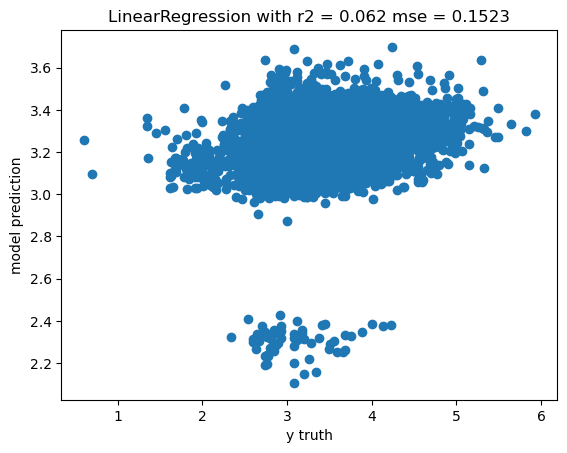

test_r2=0.0607 test_mse=0.1560


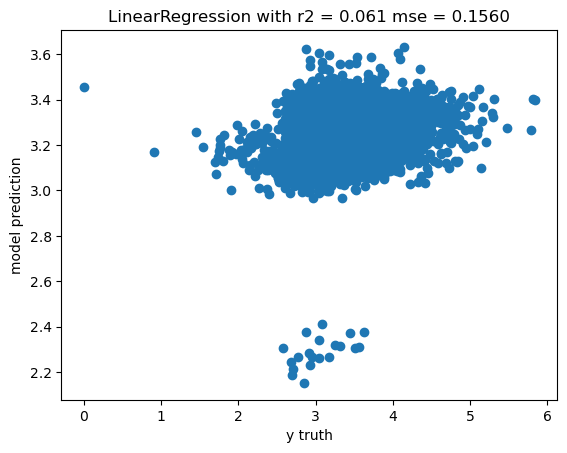

In [43]:
# Check for overfitting
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'train_{r2=:.4f} train_{mse=:.4f}')

plt.scatter(y_train, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()


# Check for generalization
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'test_{r2=:.4f} test_{mse=:.4f}')

plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [44]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

train_r2=0.8704 train_mse=0.0210


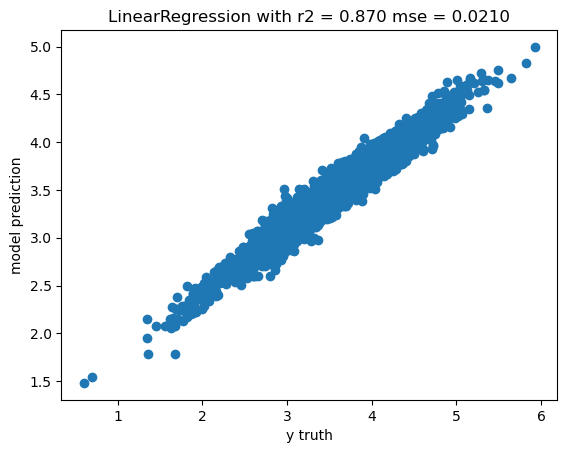

test_r2=0.0764 test_mse=0.1534


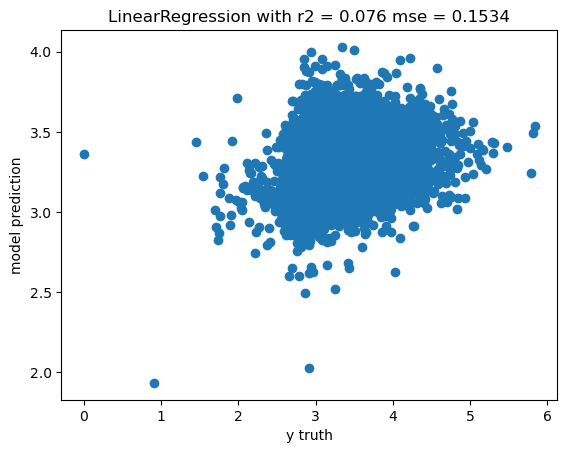

In [45]:
# Check for overfitting
pred = model.predict(X_train)
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
print(f'train_{r2=:.4f} train_{mse=:.4f}')

plt.scatter(y_train, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()


# Check for generalization
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'test_{r2=:.4f} test_{mse=:.4f}')

plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()